<a href="https://colab.research.google.com/github/Navodini1995/datasciencecoursera/blob/master/orig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Surgical CIFAR
1.) This work is done using the robotic instrument segmentation dataset of MICCAI endoscopic vision challenge 2017. This dataset contains 10 sequences recorded with a resolution of 1920 x 1080 using da Vinci surgical systems. In each sequence, significant instrument motion and visibility are observed and sampled at a rate of 1 Hz. There are 7 different robotic surgical instruments, such as Large Needle Driver, Cadiere Forceps, Bipolar Forceps, Vessel Sealer, Prograsp Forceps, Monopolar Curved Scissors, and additionally a drop-in ultrasound probe. <br>

2.)  Robotic  scene  segmentation  challenge:The  sourcedomain dataset is from the robotic instrument segmentationdataset  of  MICCAI  endoscopic  vision  challenge  2018.The training set includes 15 robotic nephrectomy operationsobtained  by  the  da  Vinci  X  or  Xi  system.  There  are  149frames  in  each  video  sequence,  and  the  frame  has  thedimensionality  of  1280*1024.  A  total  of  9  objects  appearin  the  dataset,  including  8  Instruments:  bipolar  forceps,prograsp  forceps,  monopolar  curved  scissors,  clip  applier,suction,  ultrasound  probe,  stapler,  and  large  needle  driverrespectively  and  kidney.  These  surgical  instruments  have  avariety  of  different  semantic  relationships  and  interactionswith the kidney. A total of 11 kinds of semantic relationshipsare  identified  to  generate  the  natural  language  descriptionfor  images.  The  identified  semantic  relationships  includemanipulating, grasping, retracting, cutting, cauterizing, loop-ing,  suctioning,  clipping,  ultrasound  sensing,  stapling,  andsuturing. <br>  

3.)The dataset used for domain adaptation is from videos about transoral robotic surgery (TORS) provided by the National University Hospital and Singapore General Hospital. All 9 patients have oropharynx cancer. Among these 9 patients, there are 8 males and 1 female with ages range of 23 to 72 and multiple cancer sites like tonsil, the base of the tongue, posterior pharyngeal wall. We filter out some poor quality videos that remain still and are not undergoing surgery. A total of 181 frames were selected based on the requirement to have at least one same surgical instrument as the Robotic scene segmentation challenge dataset. These 181 frames are cropped and then resized to the same shape with MICCAI Robotic scene segmentation challenge dataset. A total of 5 objects are in the dataset, including tissue, clip applier, suction, spatulated monopolar cautery, Maryland dissector. The 5 kinds of semantic relationships comprise manipulating, grasping, cauterizing, suctioning, clipping. We split the dataset based on different patients. The training dataset has 48+133 frames collected from Patient. <br>


# Combining 3 datasets:
Total videos sequences: 45 <br>
MICCAI_18: [1-16] (seq 8th ignored)<br>
MICCAI_17:[17-26] <br>
SGH: [27-45] <br>
Classes: 12 ( 'tissue', 'bipolar_forceps', 'fenestrated_bipolar', 'prograsp_forceps', 'large_needle_driver', 'monopolar_curved_scissors', 'ultrasound_probe', 'suction', 'clip_applier', 'stapler', 'maryland_dissector','spatulated_monopolar_cautery') <br>

File_Naming: filename_obj_seq_class.png <br>

Download and unzip the dataset into MICCAI_17_18_SGH folder
url: https://drive.google.com/file/d/1f4mnZiS6HfxDQ1xbETdxQWYBQAu28Min/view?usp=sharing

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1f4mnZiS6HfxDQ1xbETdxQWYBQAu28Min'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('MICCAI_17_18_SGH.zip')
!unzip -q MICCAI_17_18_SGH.zip

Combined Dataset information:<br>
sample size: 11279

In [2]:
!ls MICCAI_17_18_SGH | wc -l

11279


Reading dataset:

sample size: 11279
label: 5 monopolar_curved_scissors


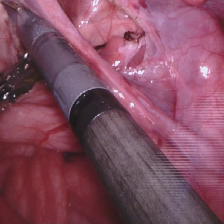

In [25]:
from glob import glob
from PIL import Image

INSTRUMENT_CLASSES = ('tissue', 'bipolar_forceps', 'fenestrated_bipolar', 'prograsp_forceps', 'large_needle_driver',
    'monopolar_curved_scissors', 'ultrasound_probe', 'suction', 'clip_applier', 'stapler', 'maryland_dissector','spatulated_monopolar_cautery')


root_dir = 'MICCAI_17_18_SGH'
img_dirs = glob(root_dir+'/**.png')
print('sample size:', len(img_dirs))
_img = Image.open(img_dirs[11278]).convert('RGB')
_target = int(img_dirs[11278][:-4].split('_')[-1:][0])
print('label:',_target, INSTRUMENT_CLASSES[_target])
_img

In [37]:
for i in range(0,12):
  print(INSTRUMENT_CLASSES[i])
  count = 0
  for line in img_dirs:
    if int(line[:-4].split('_')[-2:][0]) > 26:
      if int(line[:-4].split('_')[-1:][0]) == i:
        count += 1
  print(count)
    

tissue
181
bipolar_forceps
0
fenestrated_bipolar
0
prograsp_forceps
0
large_needle_driver
0
monopolar_curved_scissors
0
ultrasound_probe
0
suction
165
clip_applier
31
stapler
0
maryland_dissector
142
spatulated_monopolar_cautery
162


In [38]:
for i in range(0,12):
  print(INSTRUMENT_CLASSES[i])
  count = 0
  for line in img_dirs:
    if int(line[:-4].split('_')[-2:][0]) < 27:
      if int(line[:-4].split('_')[-1:][0]) == i:
        count += 1
  print(count)

tissue
2008
bipolar_forceps
2396
fenestrated_bipolar
0
prograsp_forceps
1960
large_needle_driver
1315
monopolar_curved_scissors
1862
ultrasound_probe
610
suction
271
clip_applier
45
stapler
131
maryland_dissector
0
spatulated_monopolar_cautery
0


In [39]:
for i in range(0,12):
  print(INSTRUMENT_CLASSES[i])
  count = 0
  for line in img_dirs:
    if int(line[:-4].split('_')[-1:][0]) == i:
      count += 1
  print(count)

tissue
2189
bipolar_forceps
2396
fenestrated_bipolar
0
prograsp_forceps
1960
large_needle_driver
1315
monopolar_curved_scissors
1862
ultrasound_probe
610
suction
436
clip_applier
76
stapler
131
maryland_dissector
142
spatulated_monopolar_cautery
162
